In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import *
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
%matplotlib inline

sns.set(style="white", palette="muted", color_codes=True)

In [10]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target

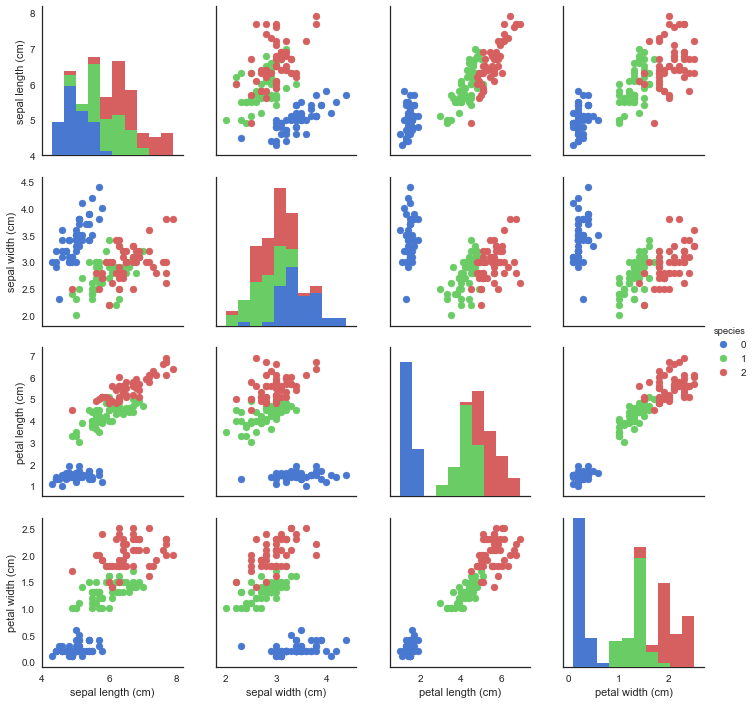

In [11]:
g = sns.PairGrid(iris_df, hue="species", vars=iris.feature_names)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

In [31]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
metrics.confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0,  9,  2],
       [ 0,  1, 10]])

In [32]:
print("Accuracy: %f" % metrics.accuracy_score(y_test, y_pred))
print("Precision: %f" % metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall: %f" % metrics.recall_score(y_test, y_pred, average="macro"))
print("F1-score: %f" % metrics.f1_score(y_test, y_pred, average="macro"))

Accuracy: 0.921053
Precision: 0.911111
Recall: 0.909091
F1-score: 0.908903


# Cross Validation

In [58]:
model = LogisticRegression(random_state=0)
cross_val_score(model, iris.data, iris.target, cv=10, scoring="f1_macro")

array([ 1.        ,  1.        ,  1.        ,  0.93265993,  0.93265993,
        0.93265993,  0.7979798 ,  0.93265993,  1.        ,  1.        ])

In [53]:
cross_val_score(model, iris.data, iris.target, cv=LeaveOneOut()).mean()

0.95333333333333337